In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import FinanceDataReader as fdr

In [2]:
plt.rc("font", family="Malgun Gothic")

In [7]:
# 005930 삼성주식번호
samsung = fdr.DataReader("005930")

In [6]:
fdr.DataReader("BTC/KRW")

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,4.826118e+05,4.838110e+05,4.681210e+05,4.732035e+05,4.732035e+05,21787470960
2014-09-18,4.727130e+05,4.762765e+05,4.309914e+05,4.428182e+05,4.428182e+05,35976322560
2014-09-19,4.424667e+05,4.475154e+05,4.012784e+05,4.119893e+05,4.119893e+05,39571102935
2014-09-20,4.118610e+05,4.417305e+05,4.068624e+05,4.267118e+05,4.267118e+05,38469009780
2014-09-21,4.258571e+05,4.303872e+05,4.103040e+05,4.161897e+05,4.161897e+05,27737663355
...,...,...,...,...,...,...
2023-04-09,3.675283e+07,3.706790e+07,3.670396e+07,3.679160e+07,3.679160e+07,12339328544076
2023-04-10,3.679762e+07,3.758512e+07,3.663453e+07,3.729902e+07,3.729902e+07,16028194560346
2023-04-11,3.730294e+07,3.932901e+07,3.728842e+07,3.917842e+07,3.917842e+07,25476497701686


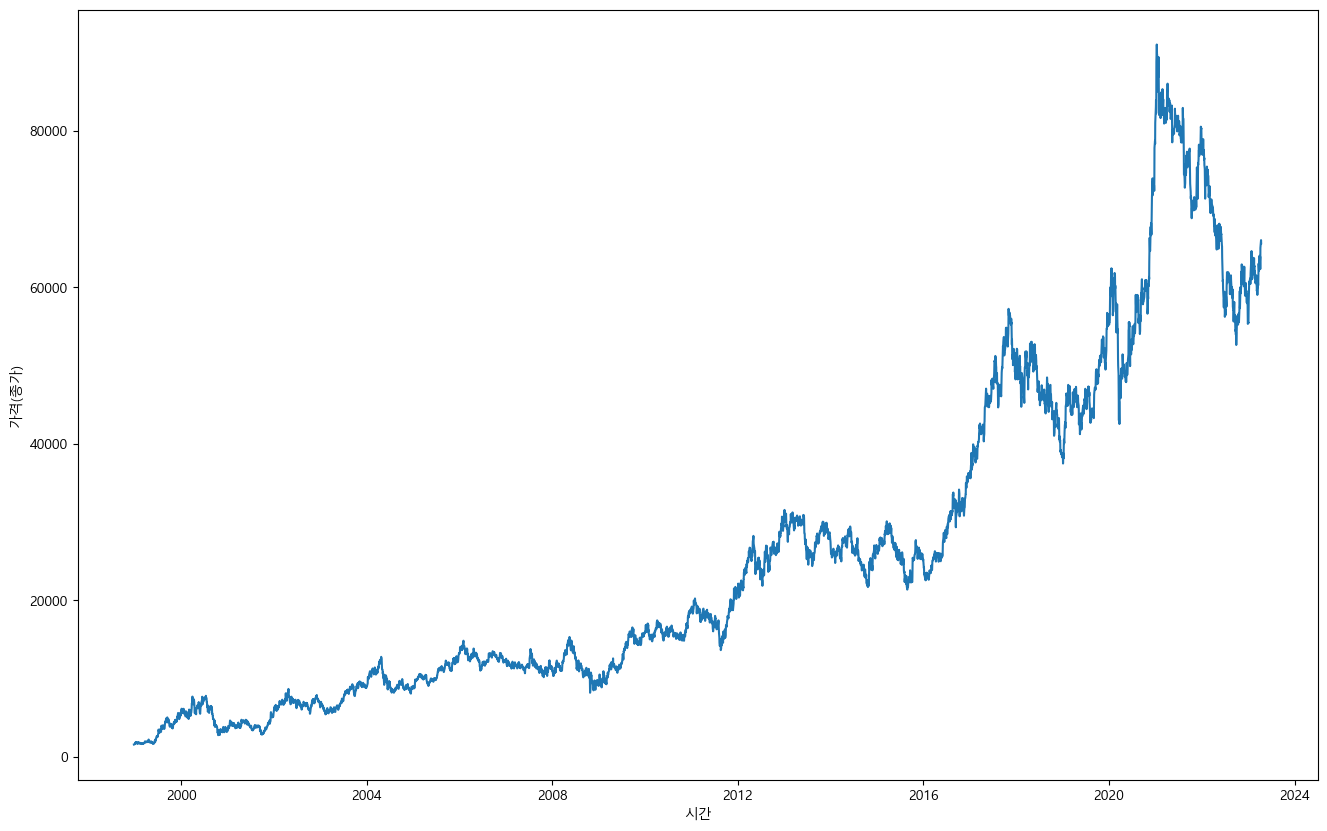

In [8]:
plt.figure(figsize=(16, 10))
sns.lineplot(x=samsung.index, y="Close", data=samsung)
plt.xlabel("시간")
plt.ylabel("가격(종가)")
plt.show()

In [ ]:
btc = fdr.DataReader("BTC/KRW")
btc

In [11]:
def show_ts(df):
    plt.figure(figsize=(16, 10))
    sns.lineplot(x=df.index, y="Close", data=df)
    plt.xlabel("시간")
    plt.ylabel("가격(종가)")
    plt.show()

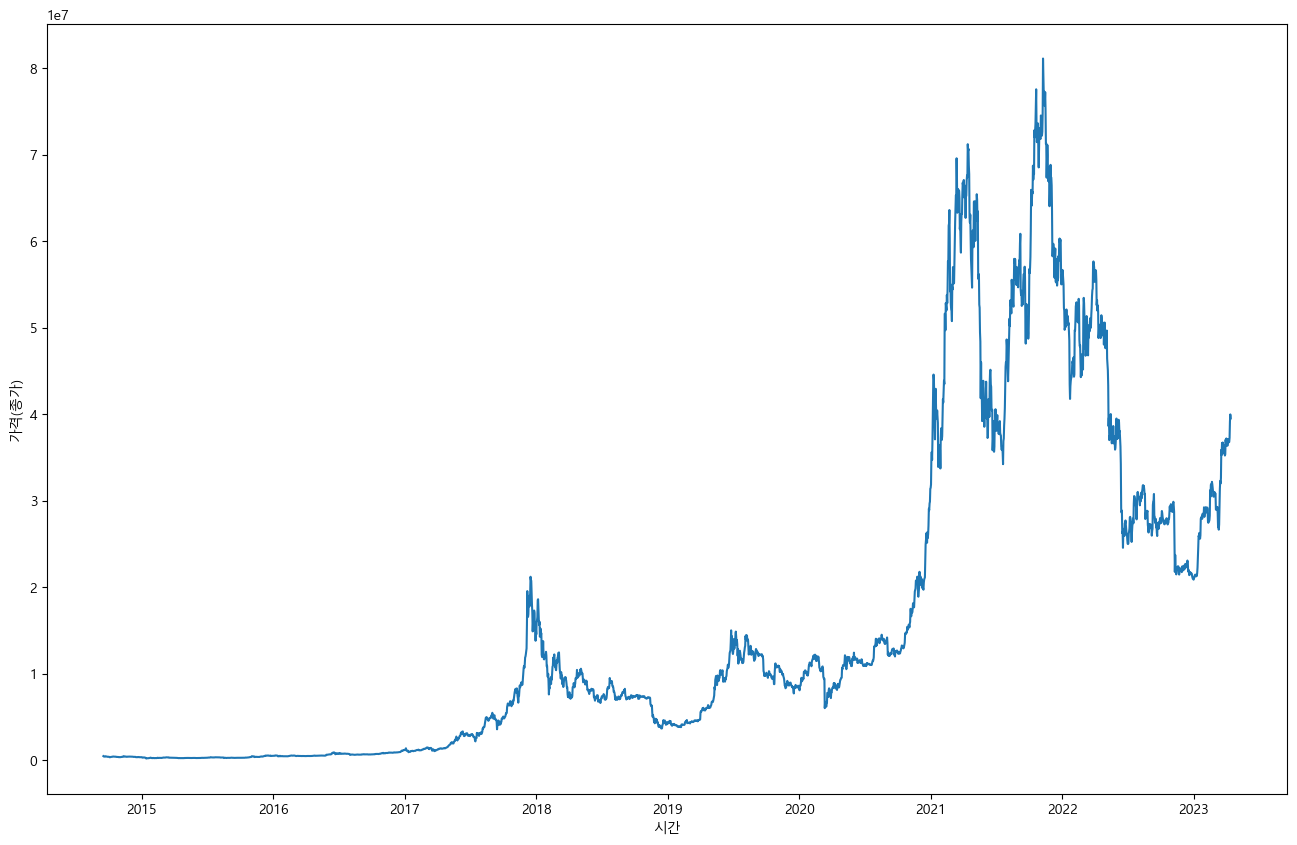

In [13]:
show_ts(btc)

In [14]:
time_steps = [["1990", "2000"],
              ["2000", "2010"],
              ["2010", "2015"],
              ["2015", "2020"],
              ["2020", "2022"]]

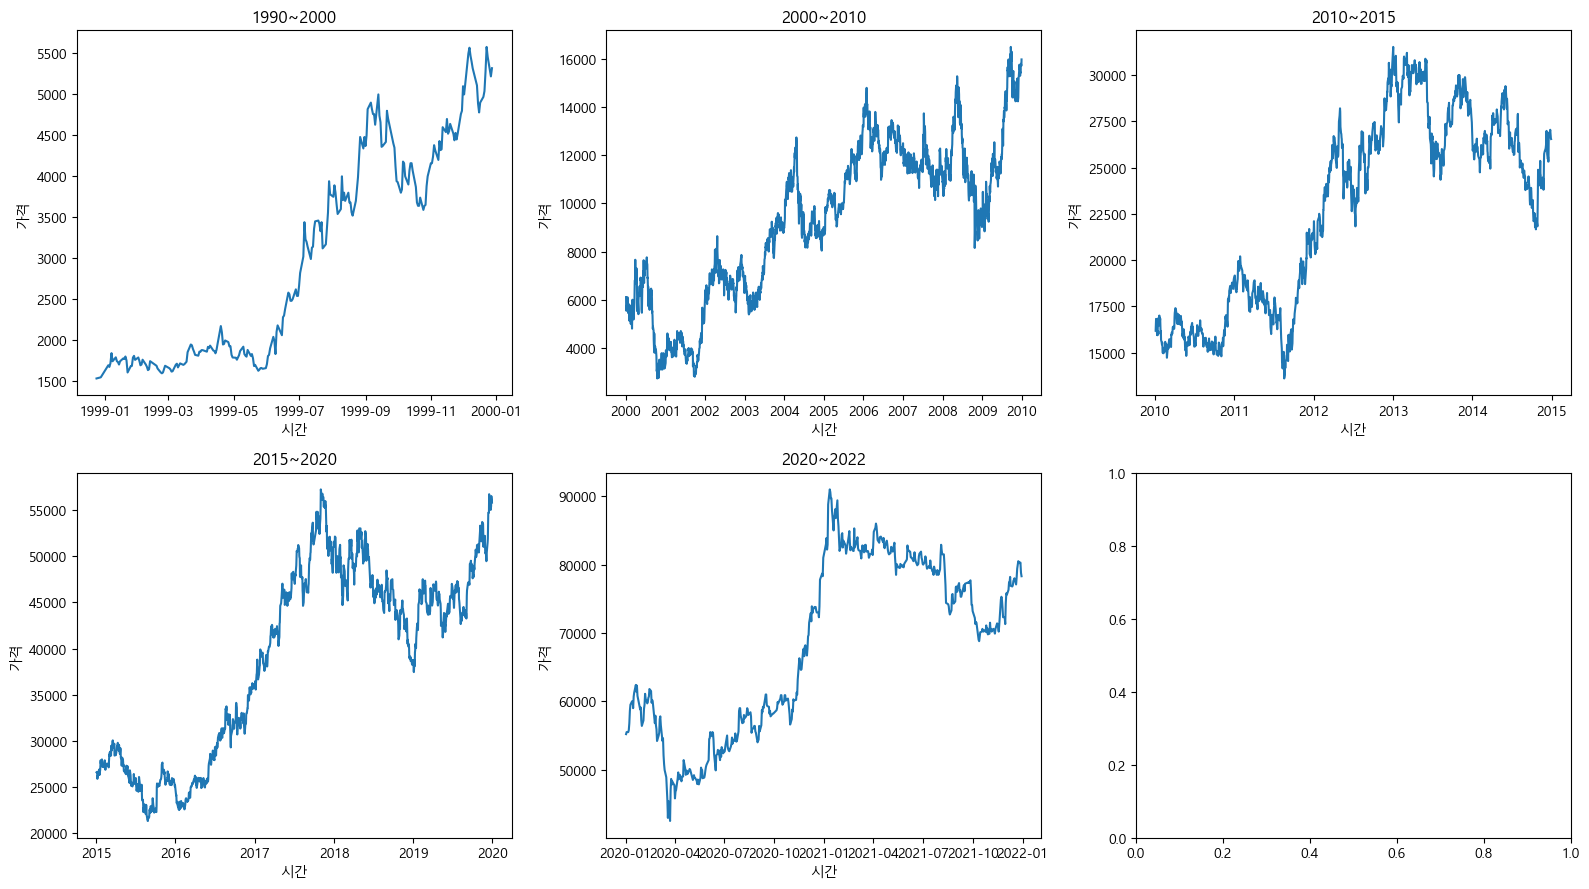

In [17]:
fig, axes = plt.subplots(2,3)
fig.set_size_inches(16,9)
for i in range(5):
    ax = axes[i//3, i%3]
    df = samsung.loc[(samsung.index > time_steps[i][0]) & (samsung.index < time_steps[i][1])]
    sns.lineplot(x=df.index, y=df["Close"], ax=ax)  #서브플롯은 데이터여러가 데이터는 데이터가 1개
    ax.set_title(f"{time_steps[i][0]}~{time_steps[i][1]}")
    ax.set_xlabel("시간")
    ax.set_ylabel("가격")
plt.tight_layout()
plt.show()
    # index => date(삼성에 날짜)  

In [18]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

* y컬럼과 ds 컬럼이 존재해야됨

In [23]:
# 데이터 가공
stock = fdr.DataReader("005930", "2022")
stock["y"] = stock["Close"]
stock["ds"] = stock.index
stock.head()

,Open,High,Low,Close,Volume,Change,y,ds
Date,,,,,,,,
2022-01-03,79400,79800,78200,78600,13502112,0.003831,78600,2022-01-03
2022-01-04,78800,79200,78300,78700,12427416,0.001272,78700,2022-01-04
2022-01-05,78800,79000,76400,77400,25470640,-0.016518,77400,2022-01-05
2022-01-06,76700,77600,76600,76900,12931954,-0.006460,76900,2022-01-06
2022-01-07,78100,78400,77400,78300,15163757,0.018205,78300,2022-01-07


In [24]:
# RAW 데이터를 fit!
m = Prophet()
m.fit(stock)

16:21:53 - cmdstanpy - INFO - Chain [1] start processing
16:21:53 - cmdstanpy - INFO - Chain [1] done processing


In [26]:
# 예측을 원하는 기간을(D) 설정
future = m.make_future_dataframe(periods=30)
future.tail()

,ds
342,2023-05-09
343,2023-05-10
344,2023-05-11
345,2023-05-12
346,2023-05-13


In [28]:
# 예측
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
342,2023-05-09,64072.079937,61426.591047,66294.926455,63907.446570,64210.738407,-170.170033,-170.170033,-170.170033,-170.170033,-170.170033,-170.170033,0.0,0.0,0.0,63901.909904
343,2023-05-10,64100.308690,61620.749503,66268.251770,63927.184152,64249.600062,-167.939246,-167.939246,-167.939246,-167.939246,-167.939246,-167.939246,0.0,0.0,0.0,63932.369444
344,2023-05-11,64128.537443,61543.552444,66337.630673,63942.440718,64286.532967,-217.837661,-217.837661,-217.837661,-217.837661,-217.837661,-217.837661,0.0,0.0,0.0,63910.699782
345,2023-05-12,64156.766196,61765.380378,66546.437528,63960.662353,64328.872923,-19.527359,-19.527359,-19.527359,-19.527359,-19.527359,-19.527359,0.0,0.0,0.0,64137.238837
346,2023-05-13,64184.994949,62101.629732,66962.880399,63977.329647,64372.690470,349.894022,349.894022,349.894022,349.894022,349.894022,349.894022,0.0,0.0,0.0,64534.888971


In [32]:
# 예측결과에 상하한가
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].iloc[-40 : -20]

,ds,yhat,yhat_lower,yhat_upper
307,2023-03-31,62951.631210,60455.275422,65229.646950
308,2023-04-03,62931.531191,60479.282763,65240.983541
309,2023-04-04,62913.903549,60664.699085,65332.972851
310,2023-04-05,62944.363088,60409.798402,65312.944431
311,2023-04-06,62922.693426,60590.080650,65392.214609
312,2023-04-07,63149.232481,60848.080579,65456.522728
313,2023-04-10,63129.132462,60635.363554,65437.888801
314,2023-04-11,63111.504820,60602.990038,65416.435335
315,2023-04-12,63141.964359,60881.785210,65684.677149
316,2023-04-13,63120.294698,60645.192804,65581.051101


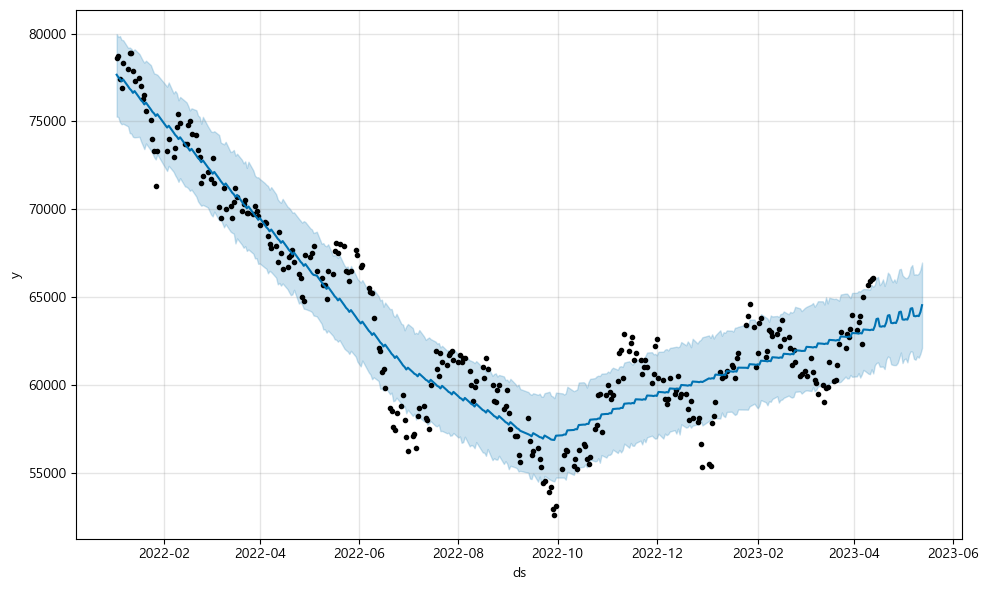

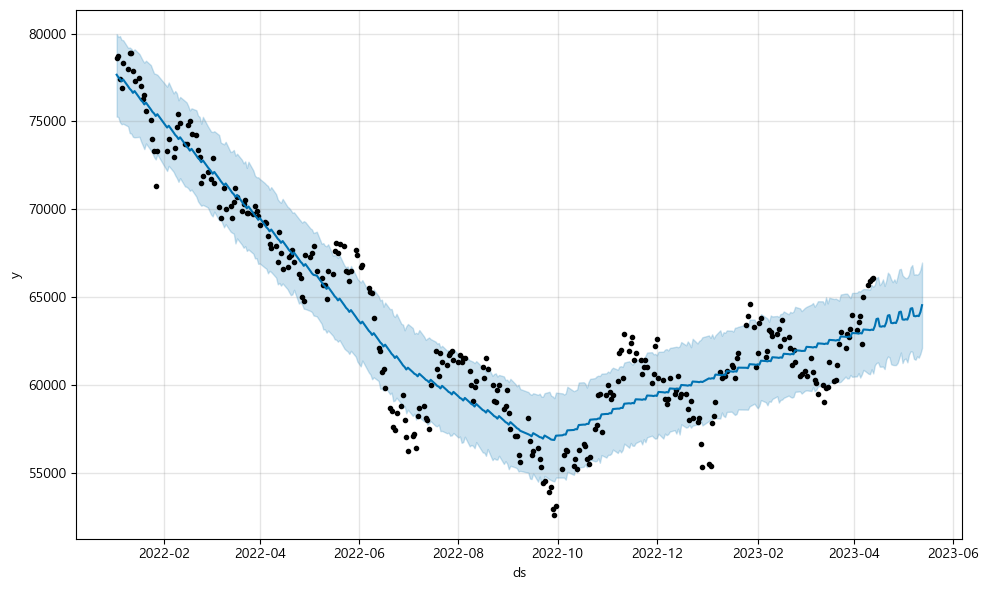

In [33]:
# 전체 데이터 확인
m.plot(forecast)

In [35]:
# 이왕이면 plotly 사용하기!
fig = plot_plotly(m, forecast)
fig

In [36]:
# 세불 컴포넌트를 이용하여 데이터 확인
plot_components_plotly(m, forecast)

In [38]:
# 변경점을 확인!
from prophet.plot import add_changepoints_to_plot

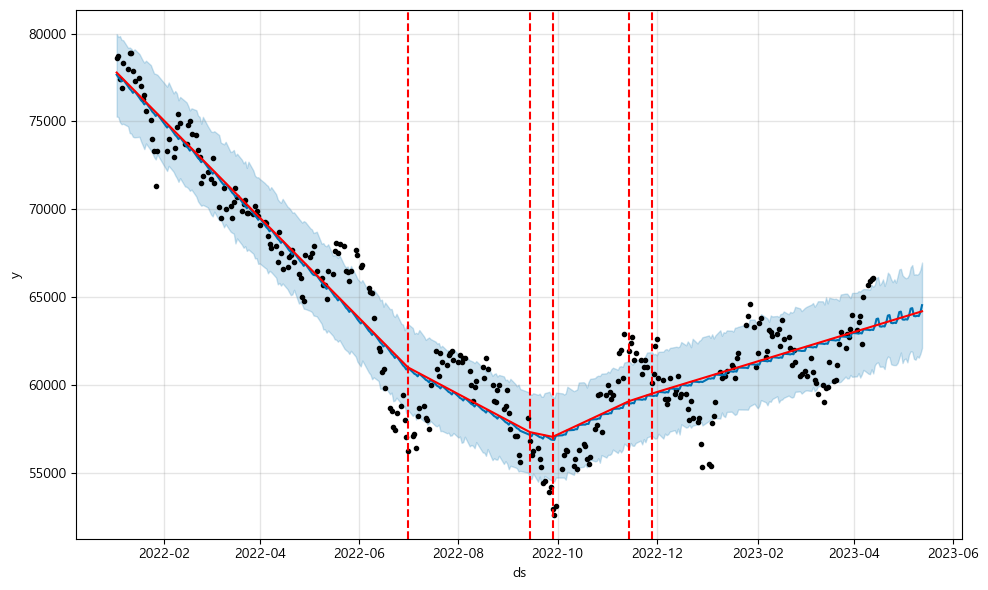

In [41]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

16:58:32 - cmdstanpy - INFO - Chain [1] start processing
16:58:32 - cmdstanpy - INFO - Chain [1] done processing


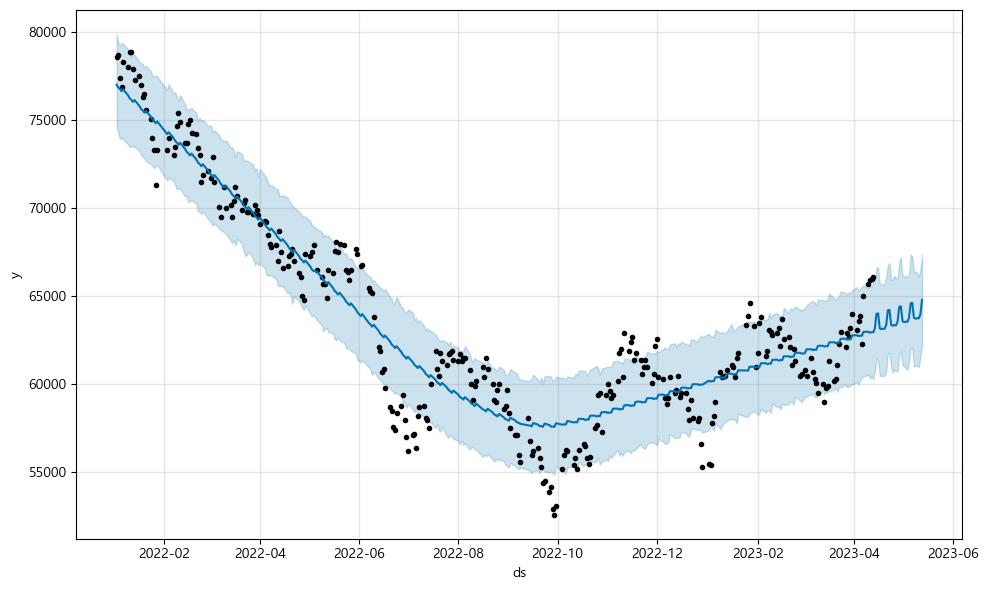

In [43]:
#  유연성 => 계수가 낮으면 과소적합이고 높으면 과대적합이다. ==> 하이퍼!!(사람이!!)
m = Prophet(changepoint_prior_scale=0.01)
forecast = m.fit(stock).predict(future)
fig = m.plot(forecast)

In [ ]:
# 서울시에서 코로나 확진자 발표